In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('acc_players-2324F.csv', sep=',', encoding='latin1',header=1)
print("ACC Stats:")
display(df.head(5))


ACC Stats:


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


need to remove the unnamed row before the actual title in the csv file

*   header=1 solved this



2. Basic Analysis:
- Calculate the total points scored by all players combined.
- Find the player who has played the most minutes (MP).
- Identify the top 5 players in terms of total rebounds (TRB).

In [ ]:
# total points
totalpoints = df[['PTS']].sum().reset_index()
# print("\nSum:")
# display(totalpoints)
print("Total Points:")
value = totalpoints.iloc[0, 1]
print(value)

Total Points:
38411


In [ ]:
mostminutes = df[['Player']].loc[df['MP'].idxmax()]
print("Player with the most minutes:")
print(mostminutes)

Player with the most minutes:
Player    Casey Morsell
Name: 135, dtype: object


In [ ]:
top5rebounds = df[['Player','TRB']].nlargest(5, 'TRB')
print("Top 5 players by total rebounds:")
print(top5rebounds)

Top 5 players by total rebounds:
              Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


3. Player Filtering:
- Create a new DataFrame containing only players who played more than 500 minutes.
- From this filtered DataFrame, determine the player with the highest total assists (AST).
- Who are the top 3 Assist Leads in the League?
- Who are the top 3 Shot Blockers?

In [ ]:
players_df=df[df['MP'] > 500]
display(players_df)

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9
5,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.540,0.544,0.400,0.781,24.6,6.1,8.9
7,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.310,0.754,23.4,4.9,10.5
9,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.420,0.842,14.9,2.2,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,Jamir Watkins,JR,F,Florida State,33,928,199,91,64,...,84,92,514,0.457,0.500,0.344,0.795,24.2,3.9,9.1
206,207,Tre White,SO,G,Louisville,29,907,170,39,24,...,53,66,357,0.456,0.515,0.299,0.752,15.0,1.7,1.8
207,208,Chauncey Wiggins,SO,F,Clemson,36,639,76,33,6,...,26,46,196,0.442,0.528,0.349,0.714,11.0,1.2,1.9
209,210,Curtis Williams,FR,G,Louisville,32,564,42,20,12,...,26,24,170,0.317,0.373,0.287,0.714,5.9,-0.2,-3.8


In [29]:
# highest total assists
highesttotalassists = players_df[['Player','AST']].loc[players_df['AST'].idxmax()]
print("Player with the highest total assists:")
print(highesttotalassists)

Player with the highest total assists:
Player    Reece Beekman
AST                 212
Name: 7, dtype: object


In [30]:
# top 3 ast lead
top3ast = players_df[['Player','AST']].nlargest(3, 'AST')
print("Top 3 players by total assists:")
print(top3ast)

Top 3 players by total assists:
             Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150


In [32]:
players_df.columns

Index(['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER',
       'WS', 'BPM'],
      dtype='object')

In [33]:
# top 3 shot blockers
top3sb = players_df[['Player','BLK']].nlargest(3, 'BLK')
print("Top 3 shot blockers:")
print(top3sb)

Top 3 shot blockers:
            Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


4. School-Based Analysis:
- Group the players by School and calculate the total points scored by each school.
- Group the players by School and calculate the total assists (AST) for each team.
- Sort the schools by total points scored and display the top 3 schools.

In [34]:
# total points by school
totalpointsbyschool = df.groupby('School')['PTS'].sum().reset_index()
totalpointsbyschool.columns = ['School', 'Total Points']
print("Total points scored by school:")
print(totalpointsbyschool)


Total points scored by school:
            School  Total Points
0   Boston College          2667
1          Clemson          2785
2             Duke          2830
3    Florida State          2526
4     Georgia Tech          2272
5       Louisville          2304
6       Miami (FL)          2424
7         NC State          3101
8   North Carolina          3032
9       Notre Dame          2113
10      Pittsburgh          2495
11        Syracuse          2442
12        Virginia          2140
13   Virginia Tech          2547
14     Wake Forest          2733


In [35]:
# total asts by school
totalassistsbyschool = df.groupby('School')['AST'].sum().reset_index()
totalassistsbyschool.columns = ['School', 'Assists']
print("Total assists by school:")
print(totalassistsbyschool)


Total assists by school:
            School  Assists
0   Boston College      509
1          Clemson      533
2             Duke      551
3    Florida State      406
4     Georgia Tech      425
5       Louisville      356
6       Miami (FL)      454
7         NC State      536
8   North Carolina      536
9       Notre Dame      335
10      Pittsburgh      452
11        Syracuse      442
12        Virginia      509
13   Virginia Tech      514
14     Wake Forest      429


In [37]:
# sort schools by total points and show 3 top
top3 = totalpointsbyschool.nlargest(3, 'Total Points')
print("Top 3 schools by points:")
print(top3)

Top 3 schools by points:
           School  Total Points
7        NC State          3101
8  North Carolina          3032
2            Duke          2830


5. Extra Credit (Bonus):
- Create a bar chart showing the top 5 players by total points scored (PTS).
- Correlation: Investigate whether there is any correlation between a player's field goal
percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
correlation coefficient.

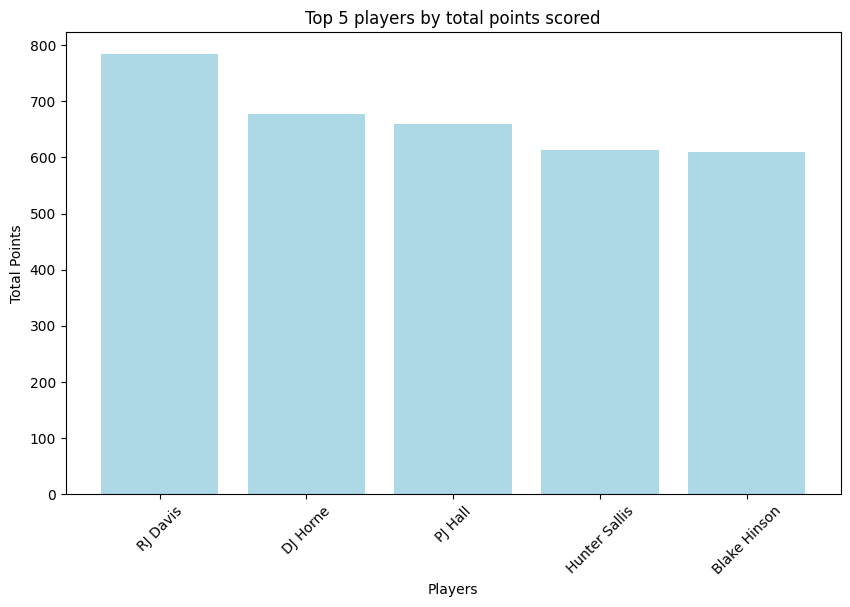

In [42]:
# top 5 players by points
top5players = df.nlargest(5, 'PTS')

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(top5players['Player'], top5players['PTS'], color='lightblue')
plt.title('Top 5 players by total points scored')
plt.xlabel('Players')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.show()

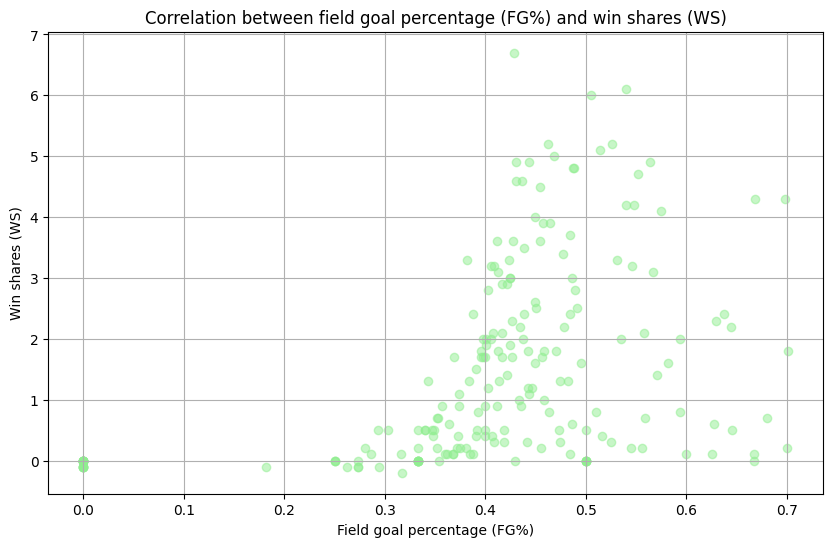

Correlation coefficient between FG% and WS: 0.42


In [43]:
# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['FG%'], df['WS'], alpha=0.5, color='lightgreen')
plt.title('Correlation between field goal percentage (FG%) and win shares (WS)')
plt.xlabel('Field goal percentage (FG%)')
plt.ylabel('Win shares (WS)')
plt.grid()
plt.show()

# correclation coefficient
correlation = df['FG%'].corr(df['WS'])
print(f'Correlation coefficient between FG% and WS: {correlation:.2f}')

## Reflection
During this assignment when working with Pandas and CSV files I found myself looking back upon previous assignments and reflecting upon how there were many ways to interact with a dataframe and how to manipulate one to your needs, especially in reference to the recent in-class assignment. The libraries themselves are already extremely efficient and being familiar with the methods or at least having some exposure made this assignment much more straightforward than other ones have been. Now that we have been given this tool and are able to interact with one of the more common data types, CSV files, interacting with data is easier due to this unified sort of system and how versatile our experience with dataframes is now.


---


Personally, the most difficult part of this assignment was just reapplying the methods we had learned before since I couldn’t remember them off the top of my head, especially the syntax of python and the libraries, yet after some research and familiarizing myself further with different methods such as nlargest when looking for the top n of something, I realized that there is a plethora of tools packed into the pandas library. Also, I had pulled out my ML knowledge and notes in order to complete the bonus coefficient portion and that was also a bit difficult. I had to recall how the scatterplots should have been formatted and referenced notes that were not from this class yet also used the matplotlib.pyplot so I was able to not only understand the relation between the two values but also reinforce my experience with the correlation coefficient.


---


When interacting with the ACC basketball statistics, I got the chance to practice cleaning data, retrieving, and then analyzing it. The process varied from understanding the format of the data, what the labels meant, what were key points of information or data that I should focus on, and also what the data implicated. My experience through this process was not unique to just this project as much of other real world applications demands a thorough understanding of any data presented to you before you are able to interact with it. Once the cleaning and analysis of the structure and impact of the data is done, you are able to apply the information you have learned to something more tangible, even if it means just betting on the top scoring schools because once you’ve ran the data analytics you now have access to this sort of information. On a broader scale, let’s say if I were a sport broadcasting channel, I would choose to focus more time or invest more attention towards higher performing schools and players and also have the statistics to back it up. These applications can be so much more varied than the ones I have listed, which is truly what I find to be the strongest suit of data science as I will proceed into more ML heavy applications which demand intensive data analysis.
